**IDENTIFYING AIRLINE PASSENGER SATISFACTION USING MACHINE LEARNING**

**Lets Start!**

**IMPORTING ALL THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.linear_model import LogisticRegression

**THE DATA SET IN KAGGLE IS ALREADY DIVIDED INTO BOTH TRAINING AND TEST DATA**





In [3]:
#Dislaying Traing Data
df = pd.read_csv('/content/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## **Data Preperation**

**Handling Missing Values**

In [4]:
df.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [5]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**Arrival Delay in Minutes has Null Values**

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace = True)

In [8]:
df.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

**Handling Categorical Values**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [12]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [13]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [14]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])

In [16]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


**Removing Unwanted columns**

In [17]:
df = df.drop(['id'],axis=1)

In [18]:
df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [19]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


**Outlier Removal**

{'whiskers': [<matplotlib.lines.Line2D at 0x79b28771b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x79b28771ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b28771b340>],
 'medians': [<matplotlib.lines.Line2D at 0x79b28771bf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b2877c0220>],
 'means': []}

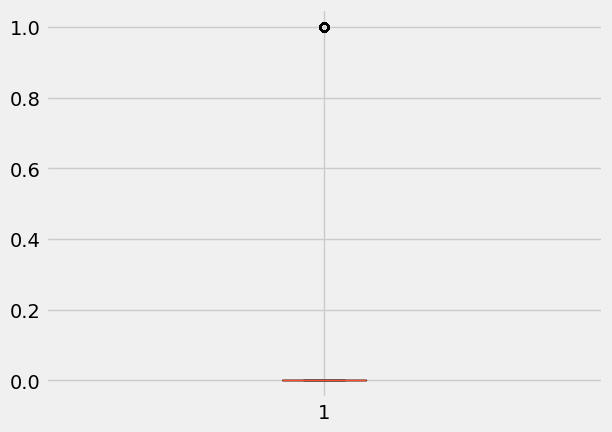

In [20]:
plt.boxplot(df['Customer Type'])

<Axes: >

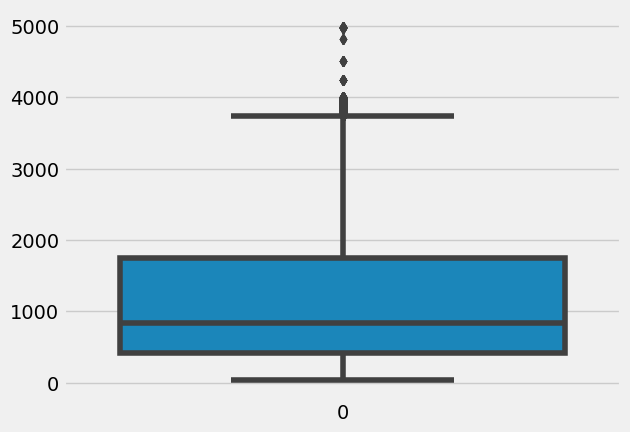

In [21]:
sns.boxplot(df['Flight Distance'])

In [22]:
quant = df.quantile(q = [0.25,0.75],axis = 0)
quant

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0.25,0.0,0.0,27.0,0.0,0.0,414.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
0.75,1.0,0.0,51.0,1.0,1.0,1743.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0


In [23]:
df.median()

Gender                                 0.0
Customer Type                          0.0
Age                                   40.0
Type of Travel                         0.0
Class                                  1.0
Flight Distance                      843.0
Inflight wifi service                  3.0
Departure/Arrival time convenient      3.0
Ease of Online booking                 3.0
Gate location                          3.0
Food and drink                         3.0
Online boarding                        3.0
Seat comfort                           4.0
Inflight entertainment                 4.0
On-board service                       4.0
Leg room service                       4.0
Baggage handling                       4.0
Checkin service                        3.0
Inflight service                       4.0
Cleanliness                            3.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
satisfaction                           0.0
dtype: floa

In [24]:
q1 = df['Flight Distance'].quantile(0.25)
q3 = df['Flight Distance'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
upper_limit,lower_limit

(3736.5, -250.5)

In [25]:
df['Flight Distance'] = np.where(df['Flight Distance']>upper_limit,df['Flight Distance'].median(),df['Flight Distance'])
df['Flight Distance'] = np.where(df['Flight Distance']<lower_limit,df['Flight Distance'].median(),df['Flight Distance'])

In [26]:
q1 = df['Customer Type'].quantile(0.25)
q3 = df['Customer Type'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df['Customer Type'].median())


Upper Limit:
0.0
Lower Limit:
0.0
Median
0.0


In [27]:
df['Customer Type'] = np.where(df['Customer Type']>upper_limit,df['Customer Type'].median(),df['Customer Type'])
df['Customer Type'] = np.where(df['Customer Type']<lower_limit,df['Customer Type'].median(),df['Customer Type'])

In [28]:
q1 = df['Checkin service'].quantile(0.25)
q3 = df['Checkin service'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df['Checkin service'].median())

Upper Limit:
5.5
Lower Limit:
2.5
Median
3.0


In [29]:
df['Checkin service'] = np.where(df['Checkin service']>upper_limit,df['Checkin service'].median(),df['Checkin service'])
df['Checkin service'] = np.where(df['Checkin service']<lower_limit,df['Checkin service'].median(),df['Checkin service'])

<Axes: >

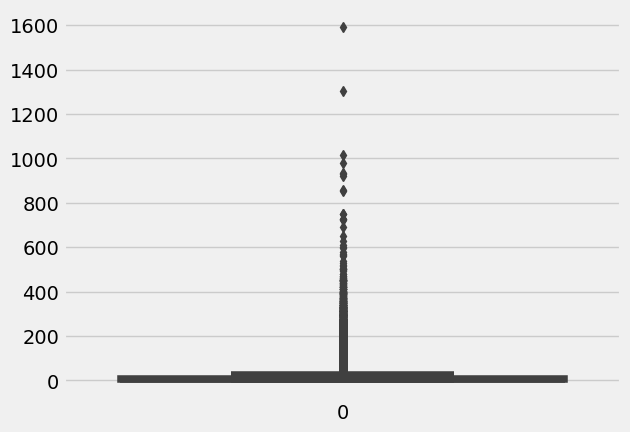

In [30]:
sns.boxplot(df['Departure Delay in Minutes'])

In [31]:
q1 = df['Departure Delay in Minutes'].quantile(0.25)
q3 = df['Departure Delay in Minutes'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df['Departure Delay in Minutes'].median())

Upper Limit:
30.0
Lower Limit:
-6.0
Median
0.0


In [32]:
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']>upper_limit,df['Departure Delay in Minutes'].median(),df['Departure Delay in Minutes'])
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']<lower_limit,df['Departure Delay in Minutes'].median(),df['Departure Delay in Minutes'])

<Axes: >

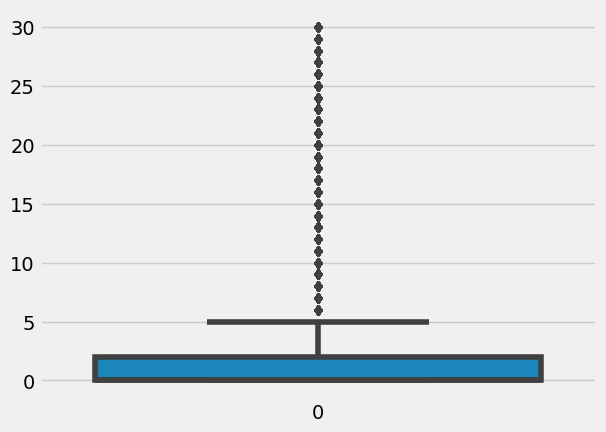

In [33]:
sns.boxplot(df['Departure Delay in Minutes'])

<Axes: >

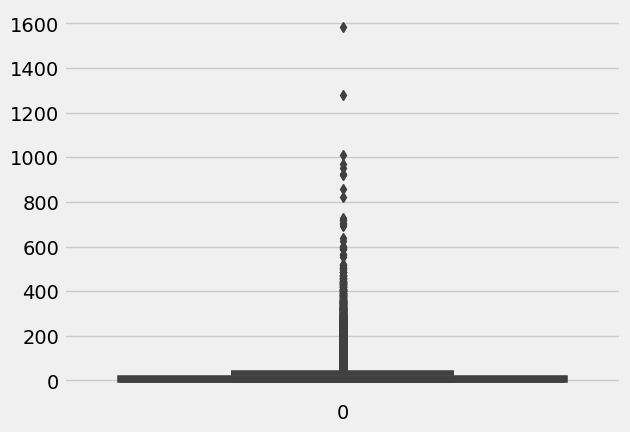

In [34]:
sns.boxplot(df['Arrival Delay in Minutes'])

In [35]:
q1 = df['Arrival Delay in Minutes'].quantile(0.25)
q3 = df['Arrival Delay in Minutes'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df['Arrival Delay in Minutes'].median())

Upper Limit:
32.5
Lower Limit:
-6.5
Median
0.0


In [36]:
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']>upper_limit,df['Arrival Delay in Minutes'].median(),df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']<lower_limit,df['Arrival Delay in Minutes'].median(),df['Arrival Delay in Minutes'])

<Axes: >

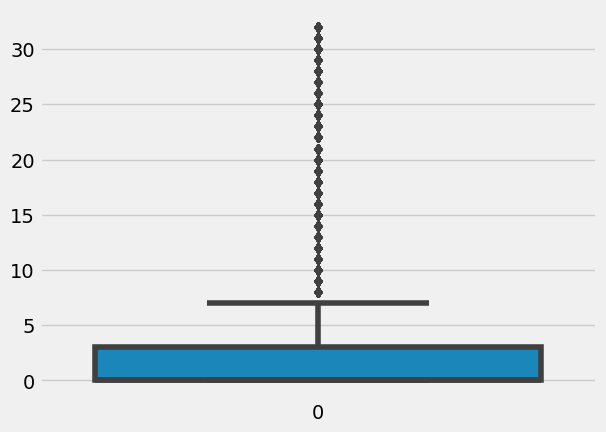

In [37]:
sns.boxplot(df['Arrival Delay in Minutes'])

**EXPLORING DATA ANALYSIS**




In [38]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.0,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.0,39.379706,0.310373,0.594135,1122.334568,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.676519,3.640428,3.286351,3.201369,3.544839,0.433333
std,0.499947,0.0,15.114964,0.462649,0.620799,911.867686,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,0.784686,1.175663,1.312273,6.677048,7.163577,0.495538
min,0.000000,0.0,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,51.000000,1.000000,1.000000,1620.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,3.000000,1.000000
max,1.000000,0.0,85.000000,1.000000,2.000000,3736.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000,1.000000


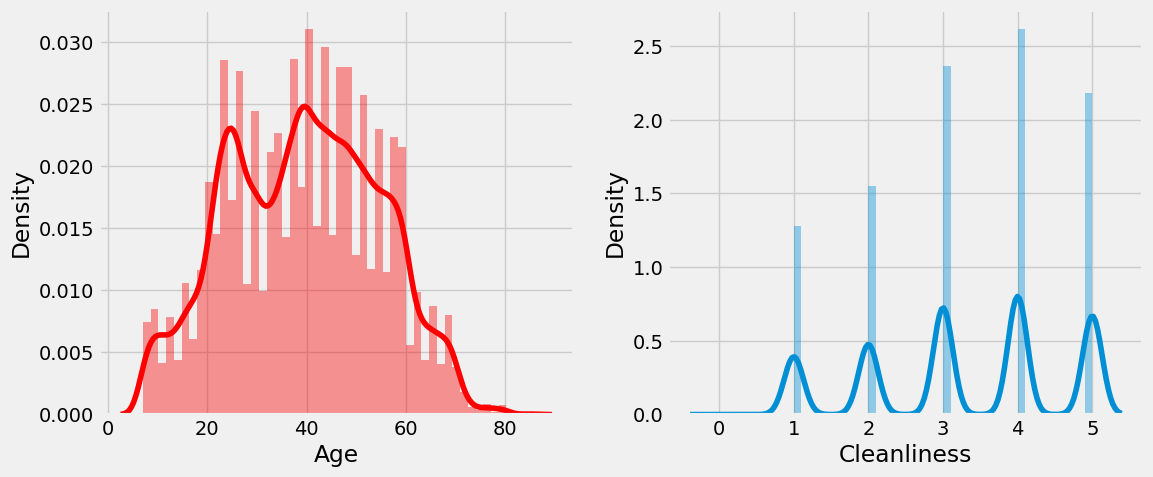

In [39]:
#Univariate Analysis
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['Age'],color = 'r')
plt.subplot(122)
sns.distplot(df['Cleanliness'])
plt.show()


In [85]:
DF = pd.read_csv('/content/train.csv')


<Axes: ylabel='satisfaction'>

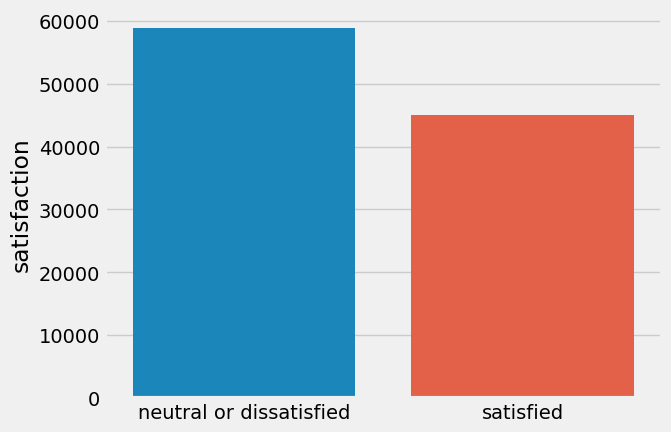

In [86]:
sns.barplot(x =DF.satisfaction.value_counts().index,y =DF.satisfaction.value_counts() )

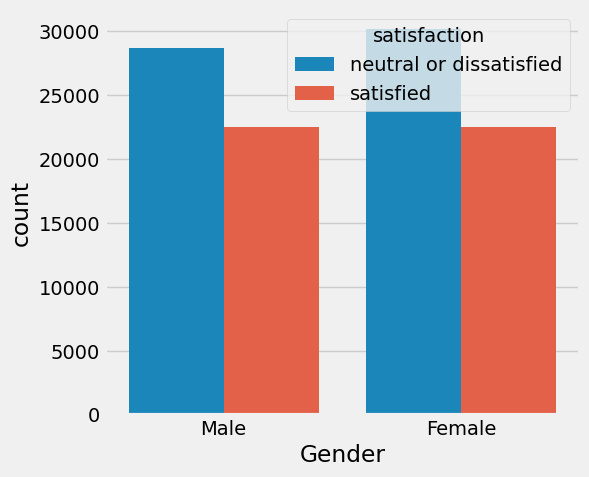

In [87]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x = DF['Gender'],hue = DF['satisfaction'],data = DF)
plt.show()

In [88]:

DF = DF.drop('id',axis=1)
DF = DF.drop('Unnamed: 0',axis = 1)

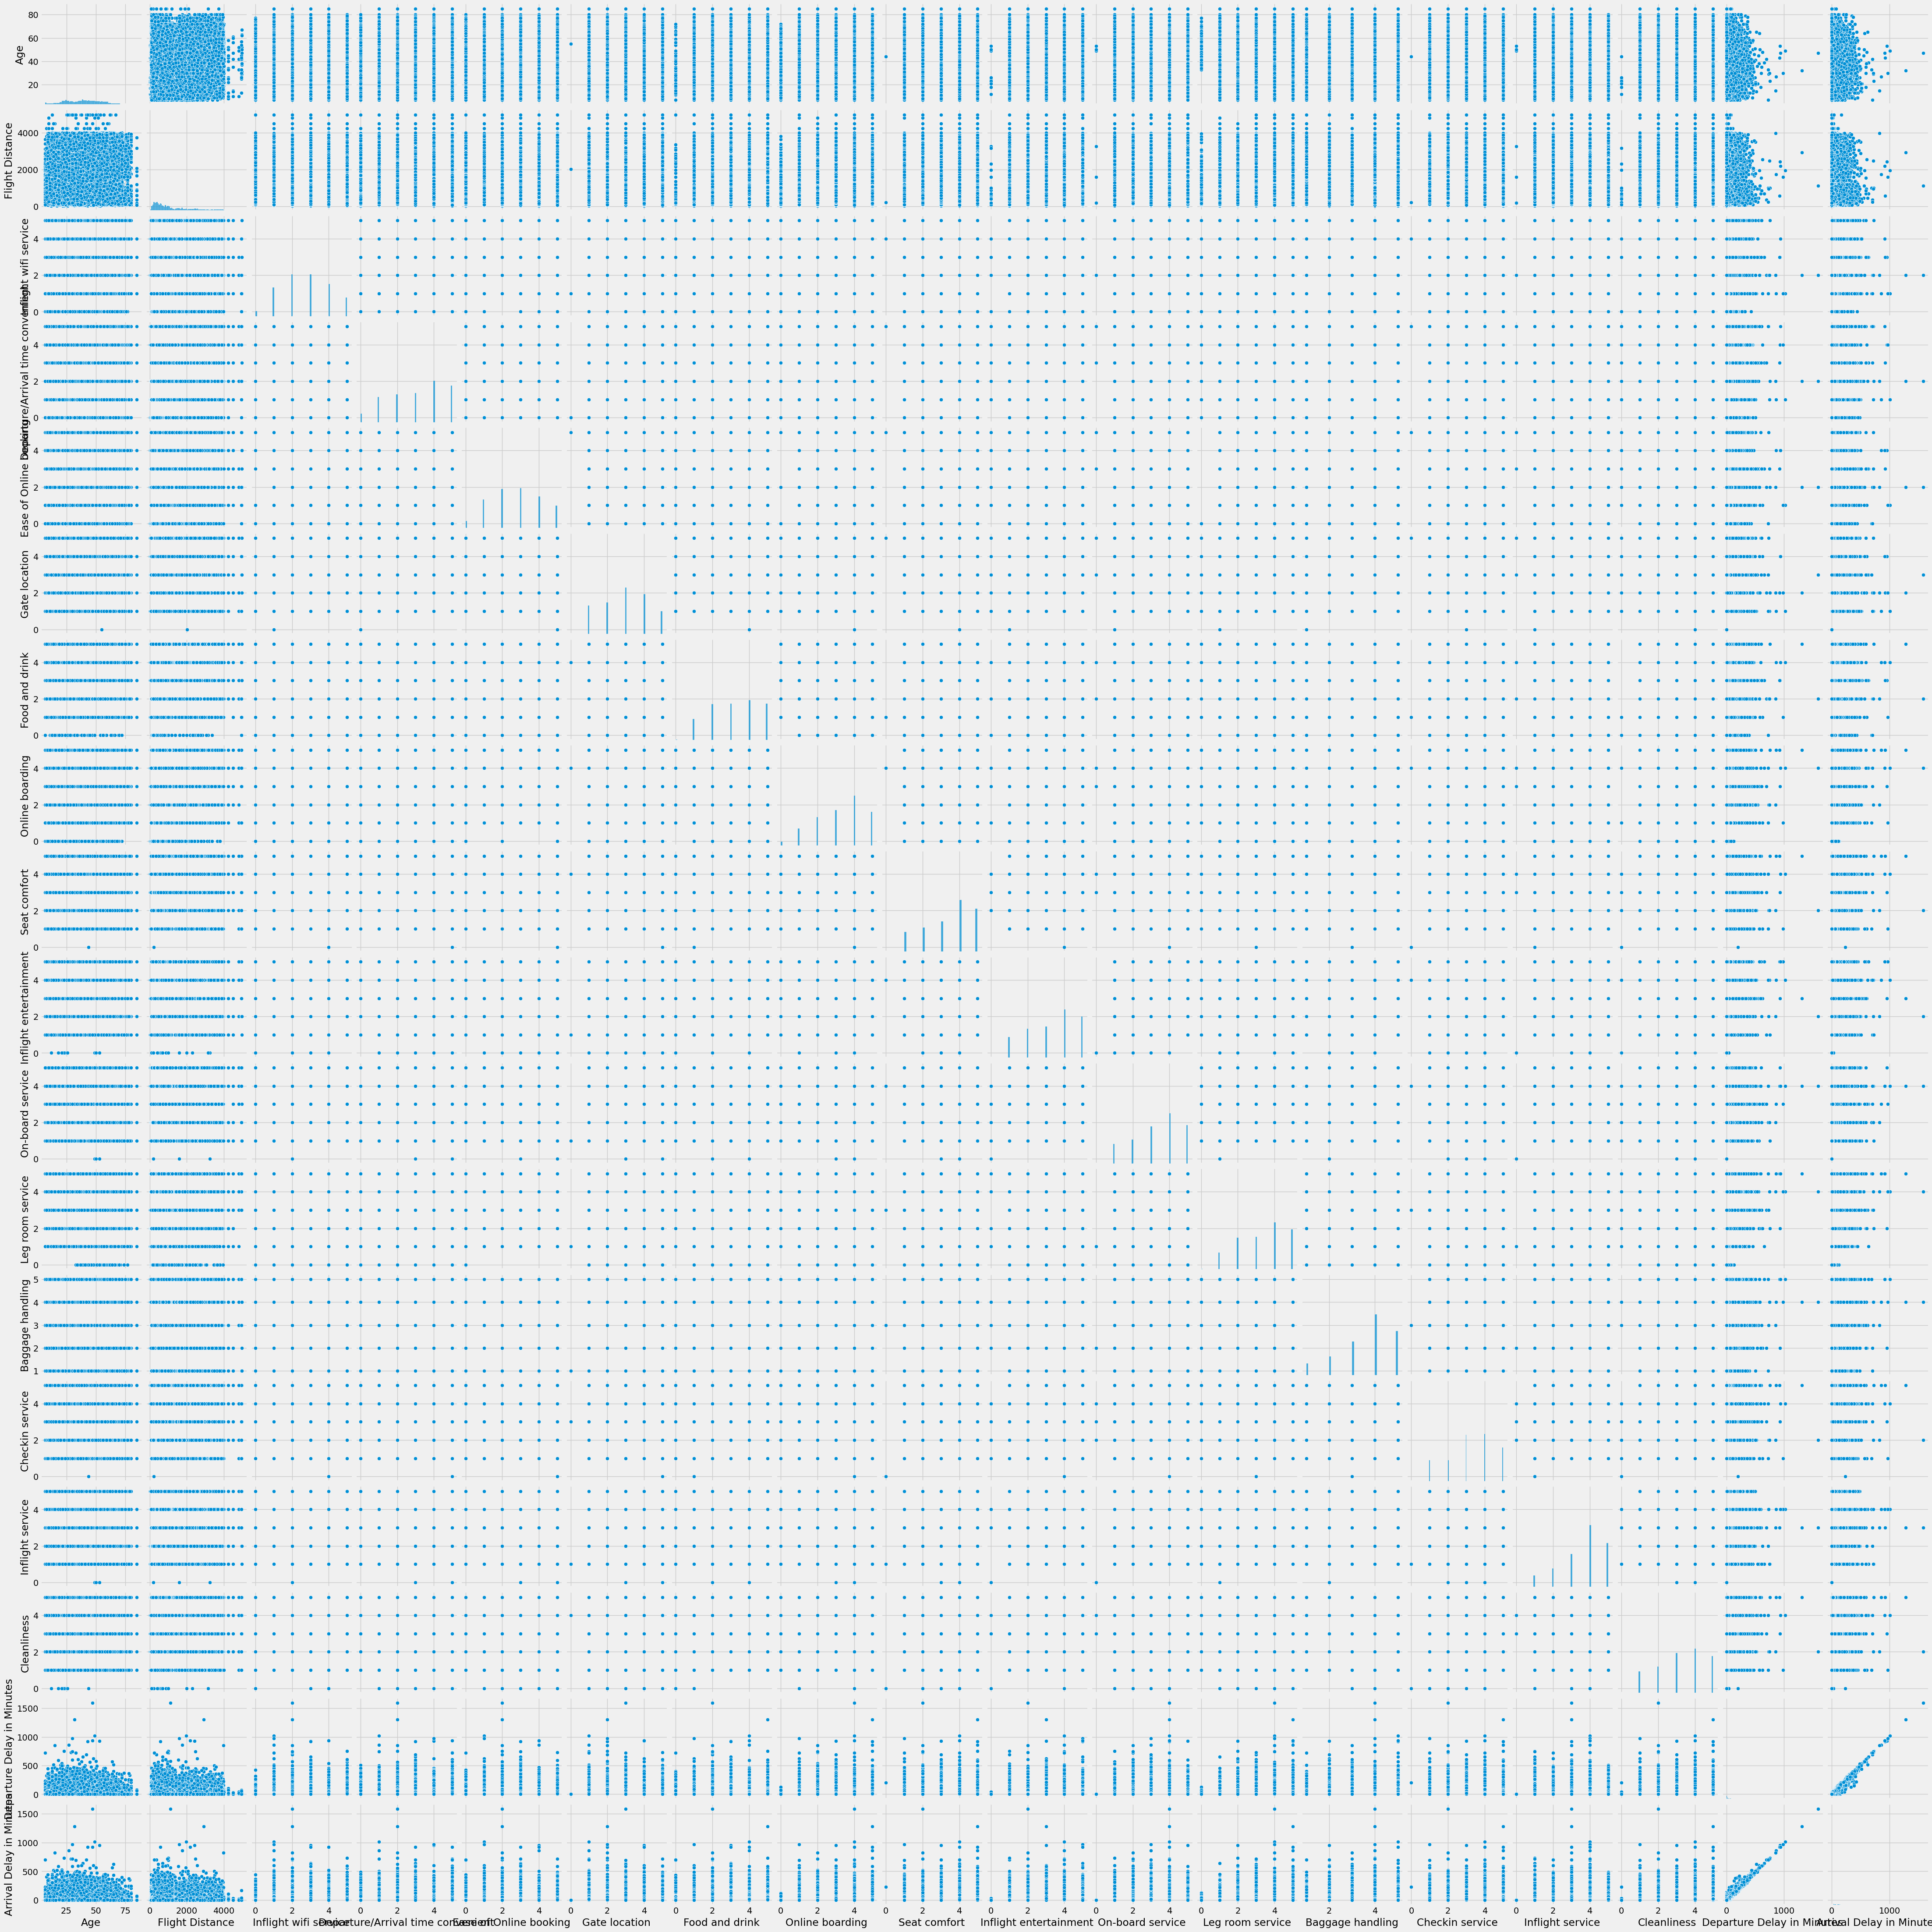

In [91]:
sns.pairplot(DF)

In [43]:
# Taking the test data and Processing it
df1 = pd.read_csv('/content/test.csv')
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [44]:
df1.shape

(25976, 25)

In [45]:
df1 = df1.drop(['Unnamed: 0'],axis = 1)


In [46]:
df1 = df1.drop(['id'],axis=1)

In [47]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [48]:
#Checking for Null Values in Testing Dataset
df1.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfaction                         False
dtype: bool

In [49]:
df1.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [50]:
df1['Arrival Delay in Minutes'].fillna(df1['Arrival Delay in Minutes'].median(),inplace = True)

In [51]:
df1.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

In [52]:
le1 = LabelEncoder()
df1['Gender'] = le1.fit_transform(df1['Gender'])
df1['Customer Type'] = le1.fit_transform(df1['Customer Type'])
df1['Type of Travel'] = le1.fit_transform(df1['Type of Travel'])
df1['Class'] = le1.fit_transform(df1['Class'])
df1['satisfaction'] = le1.fit_transform(df1['satisfaction'])

In [53]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [54]:
#Replacing the outliers with median


In [55]:
q1 = df1['Arrival Delay in Minutes'].quantile(0.25)
q3 = df1['Arrival Delay in Minutes'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df1['Arrival Delay in Minutes'].median())

Upper Limit:
32.5
Lower Limit:
-6.5
Median
0.0


In [56]:
df1['Arrival Delay in Minutes'] = np.where(df1['Arrival Delay in Minutes']>upper_limit,df1['Arrival Delay in Minutes'].median(),df1['Arrival Delay in Minutes'])
df1['Arrival Delay in Minutes'] = np.where(df1['Arrival Delay in Minutes']<lower_limit,df1['Arrival Delay in Minutes'].median(),df1['Arrival Delay in Minutes'])

In [57]:
q1 = df1['Departure Delay in Minutes'].quantile(0.25)
q3 = df1['Departure Delay in Minutes'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df1['Departure Delay in Minutes'].median())

Upper Limit:
30.0
Lower Limit:
-6.0
Median
0.0


In [58]:
df1['Departure Delay in Minutes'] = np.where(df1['Departure Delay in Minutes']>upper_limit,df1['Departure Delay in Minutes'].median(),df1['Departure Delay in Minutes'])
df1['Departure Delay in Minutes'] = np.where(df1['Departure Delay in Minutes']<lower_limit,df1['Departure Delay in Minutes'].median(),df1['Departure Delay in Minutes'])

In [59]:
q1 = df1['Flight Distance'].quantile(0.25)
q3 = df1['Flight Distance'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df1['Flight Distance'].median())

Upper Limit:
3739.0
Lower Limit:
-251.0
Median
849.0


In [60]:
df1['Flight Distance'] = np.where(df1['Flight Distance']>upper_limit,df1['Flight Distance'].median(),df1['Flight Distance'])
df1['Flight Distance'] = np.where(df1['Flight Distance']<lower_limit,df1['Flight Distance'].median(),df1['Flight Distance'])

In [61]:
q1 = df1['Customer Type'].quantile(0.25)
q3 = df1['Customer Type'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df1['Customer Type'].median())

Upper Limit:
0.0
Lower Limit:
0.0
Median
0.0


In [62]:
df1['Customer Type'] = np.where(df1['Customer Type']>upper_limit,df1['Customer Type'].median(),df1['Customer Type'])
df1['Customer Type'] = np.where(df1['Customer Type']<lower_limit,df1['Customer Type'].median(),df1['Customer Type'])

In [63]:
q1 = df1['Checkin service'].quantile(0.25)
q3 = df1['Checkin service'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q3 - 1.5*IQR
print('Upper Limit:')
print(upper_limit)
print('Lower Limit:')
print(lower_limit)
print('Median')
print(df1['Checkin service'].median())

Upper Limit:
5.5
Lower Limit:
2.5
Median
3.0


In [64]:
df1['Checkin service'] = np.where(df1['Checkin service']>upper_limit,df1['Checkin service'].median(),df1['Checkin service'])
df1['Checkin service'] = np.where(df1['Checkin service']<lower_limit,df1['Checkin service'].median(),df1['Checkin service'])

**Splitting the data into Training and Testing Data**

In [65]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

In [66]:
x_test = df1.iloc[:,:-1]
y_test = df1.iloc[:,-1]

**MileStone4: Model Building**




In [67]:
#Decision Tree
def dt(X_train,y_train,X_test,y_test):
  reg3 = DecisionTreeClassifier(criterion='entropy')
  reg3.fit(X_train,y_train)
  print('accuracy')
  print('Training accuracy= ',reg3.score(X_train,y_train))
  print('test accuracy= ',reg3.score(X_test,y_test))
  y_test_pred = reg3.predict(X_test)
  print('Test data confusion matrix: ')
  print(confusion_matrix(y_test,y_test_pred))
  print('Test data classification report : ')
  print(classification_report(y_test,y_test_pred))


In [68]:
dt(x_train,y_train,x_test,y_test)

accuracy
Training accuracy=  1.0
test accuracy=  0.9389051432091161
Test data confusion matrix: 
[[13753   820]
 [  767 10636]]
Test data classification report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     14573
           1       0.93      0.93      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [69]:
#Random Forest Model
def RF(X_train,y_train,X_test,y_test):
  reg4 = RandomForestClassifier(criterion='entropy')
  reg4.fit(X_train, y_train)
  print('Accuracy:')
  print('Training accuracy = ',reg4.score(X_train,y_train))
  print('Test accuracy =',reg4.score(X_test,y_test))
  y_test_pred = reg4.predict(X_test)
  print('Test data confusion matrix')
  print(confusion_matrix(y_test,y_test_pred))
  print('Accuracy Score:',accuracy_score(y_test,y_test_pred))
  print('Test data classification report : ',classification_report(y_test,y_test_pred))
  print('Predicting the data')


In [70]:
RF(x_train,y_train,x_test,y_test)

Accuracy:
Training accuracy =  0.9999903757314444
Test accuracy = 0.9585386510625192
Test data confusion matrix
[[14240   333]
 [  744 10659]]
Accuracy Score: 0.9585386510625192
Test data classification report :                precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Predicting the data


In [71]:
#KNN model
def knn(X_train,y_train,X_test,y_test):
  reg = KNeighborsClassifier(n_neighbors=5)
  reg.fit(X_train,y_train)
  print('Accuracy')
  print('Training accuracy =',reg.score(X_train,y_train))
  print('Test accuracy= ',reg.score(X_test,y_test))
  y_test_pred = reg.predict(X_test)
  print('Test data confusion matrix: ')
  print(confusion_matrix(y_test,y_test_pred))
  print('Test data classification_report :')
  print(classification_report(y_test,y_test_pred))


In [72]:
knn(x_train,y_train,x_test,y_test)

Accuracy
Training accuracy = 0.8497074222359101
Test accuracy=  0.7663612565445026
Test data confusion matrix: 
[[12121  2452]
 [ 3617  7786]]
Test data classification_report :
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     14573
           1       0.76      0.68      0.72     11403

    accuracy                           0.77     25976
   macro avg       0.77      0.76      0.76     25976
weighted avg       0.77      0.77      0.76     25976



In [73]:
#Logistic Regression
def lg(X_train,y_train,X_test,y_test):
  reg1 = LogisticRegression()
  reg1.fit(X_train,y_train)
  print('accuracy')
  print('Training accuracy= ',reg1.score(X_train,y_train))
  print('Testing accuracy= ',reg1.score(X_test,y_test))
  y_test_pred = reg1.predict(X_test)
  print('Test data confusion matrix:')
  print(confusion_matrix(y_test,y_test_pred))
  print('Test data classification report: ')
  print(classification_report(y_test,y_test_pred))


In [74]:
lg(x_train,y_train,x_test,y_test)

accuracy
Training accuracy=  0.8121342777948876
Testing accuracy=  0.809708962118879
Test data confusion matrix:
[[11662  2911]
 [ 2032  9371]]
Test data classification report: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     14573
           1       0.76      0.82      0.79     11403

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



In [78]:
#Predicting using Random forest Classification
reg4 = RandomForestClassifier(criterion='entropy')
reg4.fit(x_train, y_train)
print('Accuracy:')
print('Training accuracy = ',reg4.score(x_train,y_train))
print('Test accuracy =',reg4.score(x_test,y_test))
y_test_pred = reg4.predict(x_test)
print('Test data confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy Score:',accuracy_score(y_test,y_test_pred))
print('Test data classification report : ',classification_report(y_test,y_test_pred))
print('Predicting the data')


Accuracy:
Training accuracy =  0.9999903757314444
Test accuracy = 0.958192177394518
Test data confusion matrix
[[14217   356]
 [  730 10673]]
Accuracy Score: 0.958192177394518
Test data classification report :                precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Predicting the data


In [79]:
reg4.predict([[1,0,13,1,2,460,1,1,1,1,1,3,1,1,1,1,1,1,1,1,25,18]])

array([0])

In [80]:
with open("./Airline Passenger.pkl",'wb') as f:
  pickle.dump(reg4,f)

In [81]:
Airline = pickle.load(open("./Airline Passenger.pkl",'rb'))